In [1]:
# libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# data
from data.data import data
from data.sys_data import sys_data 

# setup
sns.set_theme()

In [2]:
# get data
raw_dataset = data.parse_data('../test_data.txt')
df = pd.DataFrame(raw_dataset)

print("Peak Bandwidth: ", sys_data.peak_theoretical_bandwidth, "GB/s")
print(raw_dataset)

Peak Bandwidth:  42.94967296 GB/s
                   name          time  space
0  Sum arrays benchmark  2.172220e-07    400
1  Sum arrays benchmark  2.067210e-06   4000
2  Sum arrays benchmark  1.990740e-05  40000


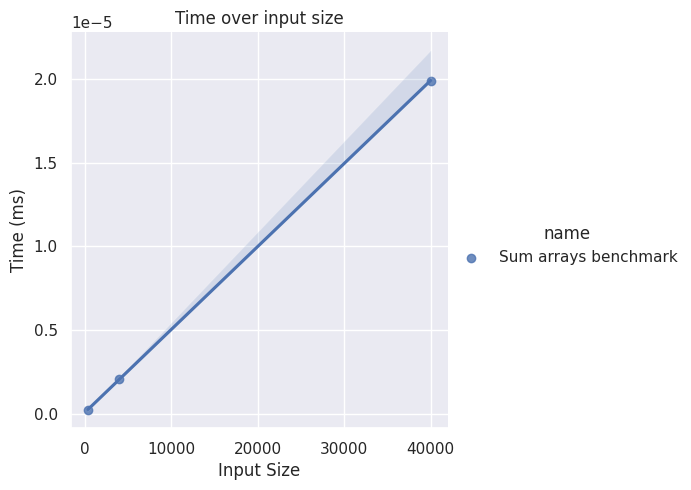

In [3]:
sns.lmplot(
    data=df, hue='name', 
    x="space", y="time",
)
plt.title('Time over input size')
plt.xlabel('Input Size')
plt.ylabel('Time (ms)')
plt.show()